In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [7]:
vader_df = pd.read_csv('tweets_vader_20k.csv')
vader_df

,Unnamed: 0,Text,Cleaned_Text,English_Only_Cleaned_Text,vader,compound,Vader_Sentiment_Type
0,0,@R_H_D__ @DanielTheHuman1 @StrewthQueen @Willi...,it really is not but good to know you wil...,it really is not but good to know you will bel...,"{'neg': 0.119, 'neu': 0.809, 'pos': 0.072, 'co...",-0.3516,NEGATIVE
1,1,@idsharman Indeed. I'll let us take a teensy f...,indeed i will let us take a teensy fraction ...,indeed i will let us take a teensy fraction of...,"{'neg': 0.0, 'neu': 0.844, 'pos': 0.156, 'comp...",0.7269,POSITIVE
2,2,@klucy239 @Mc3Mc336241251 @GOP actually its no...,actually its not not only have child drag ...,actually its not not only have child drag been...,"{'neg': 0.063, 'neu': 0.937, 'pos': 0.0, 'comp...",-0.2684,NEGATIVE
3,3,#SINGAPORE: Government considering repeal of s...,government considering repeal of sodomy law ...,government considering repeal of sodomy law al...,"{'neg': 0.136, 'neu': 0.606, 'pos': 0.258, 'co...",0.2960,POSITIVE
4,4,"""On A Clear Day You Can See Forever"" #musical ...",on a clear day you can see forever opening ni...,on a clear day you can see forever opening nig...,"{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compou...",0.9349,POSITIVE
...,...,...,...,...,...,...,...
19995,19995,the movie has lit rally like 0.0001% lgbt cont...,the movie has lit rally like 0 0001% lgbt cont...,the movie lit rally like 0 0001 % content ko wo k,"{'neg': 0.0, 'neu': 0.872, 'pos': 0.128, 'comp...",0.3612,POSITIVE
19996,19996,@Julia20526177 @AubryAndrews LGBT allies,lgbt allies,allies,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL
19997,19997,As long as lgbt are hygenic and clean and not ...,as long as lgbt are hygenic and clean and not ...,as long as are and clean and not gross then th...,"{'neg': 0.0, 'neu': 0.665, 'pos': 0.335, 'comp...",0.7231,POSITIVE
19998,19998,GOP-controlled states sue over LGBT-inclusive ...,gop-controlled states sue over lgbt-inclusive ...,gop-controlled sue over lgbt-inclusive policy ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,NEUTRAL


In [8]:
X = vader_df.drop(['Vader_Sentiment_Type'], axis=1)
y = vader_df['Vader_Sentiment_Type']

In [9]:
activity_count = y.value_counts()
print(activity_count)

POSITIVE    8852
NEGATIVE    7314
NEUTRAL     3834
Name: Vader_Sentiment_Type, dtype: int64


<AxesSubplot:ylabel='Vader_Sentiment_Type'>

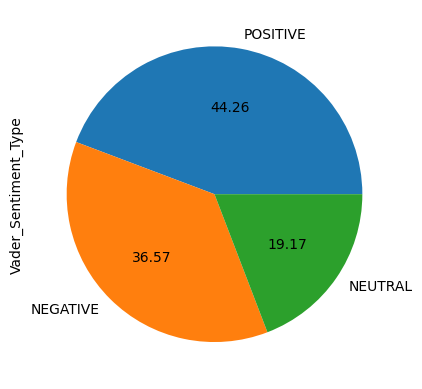

In [10]:
y.value_counts().plot.pie(autopct='%.2f')

In [44]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# print(y_train.value_counts())

In [11]:
sentiment_postive, sentiment_negative, sentiment_neutral= vader_df['Vader_Sentiment_Type'].value_counts()

class_negative = vader_df[vader_df['Vader_Sentiment_Type'] == 'NEGATIVE']
class_positive = vader_df[vader_df['Vader_Sentiment_Type'] == 'POSITIVE']
class_neutral = vader_df[vader_df['Vader_Sentiment_Type'] == 'NEUTRAL']# print the shape of the class
print('NEG CLASS:', class_negative.shape)
print('POS CLASS:', class_positive.shape)
print('NEUTRAL CLASS:', class_neutral.shape)

NEG CLASS: (7314, 7)
POS CLASS: (8852, 7)
NEUTRAL CLASS: (3834, 7)


In [47]:
class_negative_over = class_negative.sample(sentiment_postive, replace=True)
#class_negative_over

class_neutral_over = class_neutral.sample(sentiment_postive, replace=True)
#class_neutral_over

In [48]:
over_balanced_data = pd.concat([class_neutral_over, class_positive, class_negative_over], axis=0)
over_balanced_data

,Cleaned_Text,filtered_Cleaned_Text,compound,Vader_Sentiment_Type
9534,lgbt nation we move,nation we move,0.0000,NEUTRAL
13830,"me, watching any media with my husband: this i...","me , watching any media with my husband : this...",0.0000,NEUTRAL
6796,ummm xbox why did u get rid of the games by lg...,why did u get rid of the by tab what,0.0000,NEUTRAL
14095,today's randoms harrystyles larrystylinson nic...,today 's louistomlinsonworldtour2022 feminist,0.0000,NEUTRAL
8062,the b in lgbt stands for b-wing,the b in for b-wing,0.0000,NEUTRAL
...,...,...,...,...
3025,no comment on the attacks on lgbt people lik...,no comment on the on people like me then,-0.3818,NEGATIVE
374,sorry. my inability to vote against people wh...,sorry . my inability to vote against people wh...,-0.7717,NEGATIVE
1282,lgbt organisations are still trying to misrepr...,are still trying to misrepresent the 's closur...,-0.6369,NEGATIVE
17900,"in today's bad takes, i saw people arguing tha...","in today 's bad , i saw people that an lgbt+ p...",-0.5647,NEGATIVE


<AxesSubplot:title={'center':'count (target)'}>

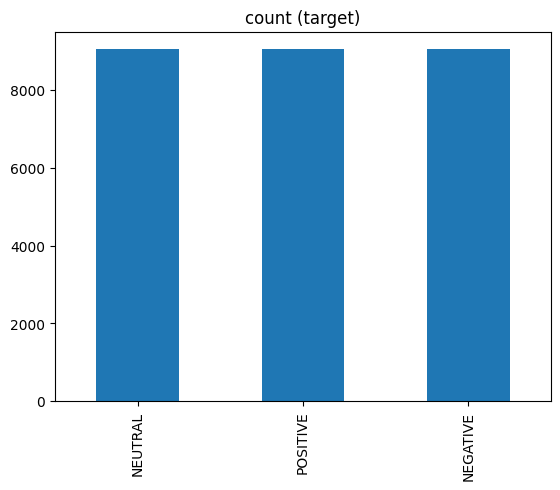

In [49]:
over_balanced_data['Vader_Sentiment_Type'].value_counts().plot(kind='bar', title='count (target)')

In [50]:
over_balanced_data.to_csv("Oversampling_cleaned_LGBT_Tweets.csv")